<a href="https://colab.research.google.com/github/jennychen0223/Mnist_models/blob/main/Mnist_MLP_units_1000_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
#!pip install np_utils


In [ ]:
 (train_feature, train_label),(test_feature, test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('train訓練資料：%8d筆' % len(train_feature))
print('test訓練資料：%8d筆' % len(train_label))

print('train_feature：', train_feature.shape)
print('train_label：', train_label.shape)


train訓練資料：   60000筆
test訓練資料：   60000筆
train_feature： (60000, 28, 28)
train_label： (60000,)


In [ ]:
def show_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2) #數字圖片大小
  plt.imshow(image, cmap='binary') #顯示黑白灰階
  plt.show()

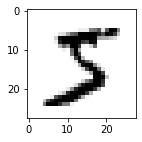

In [ ]:
show_image(train_feature[0])

In [ ]:
print(train_label[0])

5


In [ ]:
def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
  plt.gcf().set_size_inches(12, 14)
  if num>25: num=25

  for i in range(0, num):
    ax = plt.subplot(5,5,i+1)
    #顯示黑白圖片
    ax.imshow(images[start_id], cmap = 'binary')
    title = 'label =' + str(labels[start_id])

    #有預測結果資料，才顯示結果
    if (len(predictions) > 0):
      title += ' ,predict =' + str(predictions[start_id])
    ax.set_title(title, fontsize=12)
    ax.set_xticks([]); ax.set_yticks([])
    start_id += 1
  plt.show()

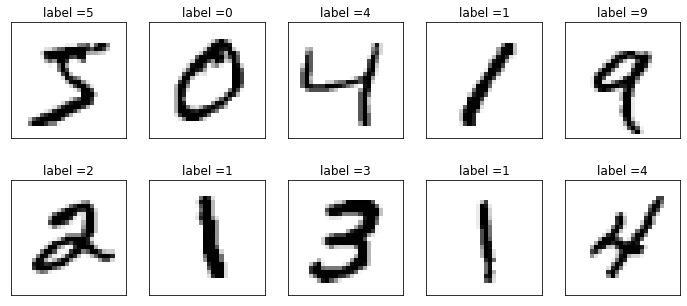

In [ ]:
show_images_labels_predictions(train_feature, train_label, [], 0, 10)

Feature 資料預處理

In [ ]:
train_feature_vector = train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

In [ ]:
print(train_feature_vector.shape, test_feature_vector.shape)

(60000, 784) (10000, 784)


In [ ]:
print(train_feature_vector[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

標準化

In [ ]:
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Label資料預處理

In [ ]:
print(train_label[0:5])

[5 0 4 1 9]


In [ ]:
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


建模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(units = 1000,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
train_history = model.fit(x=train_feature_normalize,
                          y=train_label_onehot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)

Epoch 1/10
240/240 - 21s - loss: 0.3513 - accuracy: 0.8951 - val_loss: 0.1634 - val_accuracy: 0.9542
Epoch 2/10
240/240 - 5s - loss: 0.1595 - accuracy: 0.9521 - val_loss: 0.1193 - val_accuracy: 0.9661
Epoch 3/10
240/240 - 5s - loss: 0.1160 - accuracy: 0.9656 - val_loss: 0.0968 - val_accuracy: 0.9712
Epoch 4/10
240/240 - 5s - loss: 0.0890 - accuracy: 0.9731 - val_loss: 0.0876 - val_accuracy: 0.9744
Epoch 5/10
240/240 - 5s - loss: 0.0743 - accuracy: 0.9770 - val_loss: 0.0841 - val_accuracy: 0.9745
Epoch 6/10
240/240 - 5s - loss: 0.0638 - accuracy: 0.9805 - val_loss: 0.0741 - val_accuracy: 0.9780
Epoch 7/10
240/240 - 5s - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0691 - val_accuracy: 0.9793
Epoch 8/10
240/240 - 5s - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.0721 - val_accuracy: 0.9781
Epoch 9/10
240/240 - 5s - loss: 0.0433 - accuracy: 0.9871 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 10/10
240/240 - 5s - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0679 - val_accuracy: 0.979

In [ ]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show


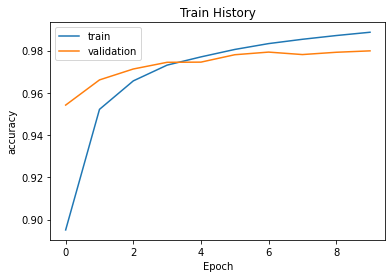

In [ ]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

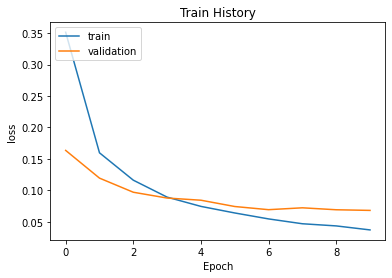

In [ ]:
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n 準確率=', scores[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0633 - accuracy: 0.9800

 準確率= 0.9800000190734863


進行預測

In [ ]:
prediction = model.predict_classes(test_feature_normalize)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


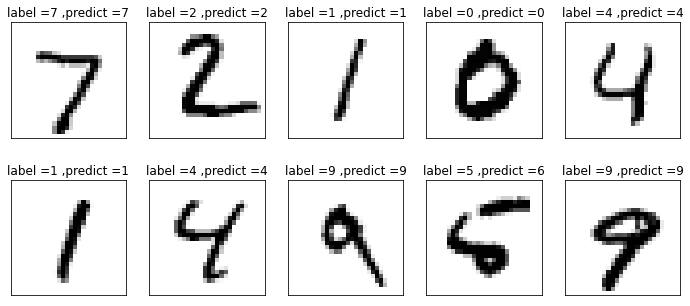

In [ ]:
show_images_labels_predictions(test_feature, test_label, prediction, 0)

混淆矩陣

In [ ]:
pd.crosstab(test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,0,0,1,1,3,0
1,0,1124,4,1,0,1,2,0,3,0
2,4,0,1011,2,1,0,2,5,7,0
3,1,0,1,993,0,3,0,3,4,5
4,2,0,6,0,954,0,2,2,2,14
5,2,0,0,10,0,869,6,1,3,1
6,10,2,0,1,2,3,937,0,3,0
7,1,4,11,2,0,0,0,1000,3,7
8,5,0,3,4,3,1,1,2,952,3


In [ ]:
df = pd.DataFrame({'label':test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [ ]:
df[(df.label==5) & (df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2291,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4360,5,3
5937,5,3


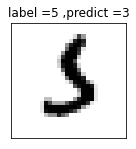

In [ ]:
show_images_labels_predictions(test_feature, test_label, prediction, start_id=340, num=1)

